Geralmente eu acho que fica mais fácil de manipular se dividir os códigos em blocos e plotar um gráfico de cada vez.

Nesse caso tipo, vou deixar como um exemplo, mas vai de vocês organizarem como vocês acharem melhor.

Vou tirar as ## que já tem para vocês não se confundirem com o que eu to falando e o que já tinha.

In [46]:
# Imports das bibliotecas -> como esse bloco nunca muda, geralmente deixo separado. 
# E ai não precisa roda sempre, só se adicionar um import novo ou reiniciar o Kernel

from pathlib import Path    # geralmente eu não costumo a usar ess path porque o pandas já le, ai fica tipo "df = pd.read_csv("dados.csv")"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

In [47]:
# CONFIGURAÇÕES GERAIS

# mudei o nome pra df porque facilita a vida

df = pd.read_csv("/Users/bia/Downloads/PoliJunior/avalensurance-bia/data/full_warehouse_merged.csv") # mudar quando vcs forem rodar
# no caso, provavelmente como eles não estão na mesma pasta, nao da pra usar só o relative path, tem que copy path mesmo

# essa linha aqui é porque o df é bem grande, então quando a gente pede o display dele (display(CSV_PATH) ou só CSV_PATH) via de regra ele coloca ... pra simplificar 
# assim, mostra todas as colunas
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 0)


# tirei as configurações aqui porque aqui estava de um jeito automático, que plotava meio que tudo, vou colocar no próximo boco

# pra uma primeira análise não tem problema, mas depois, muita informação deixa o notebook pesado e pode virar meio porre quando vc da um run all
# ai quando vcs já sabem mais ou menos o que querem saber, da pra fazer de um jeito mais simplificado 

df.info() # aqui o pandas te da informações desse df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64800 entries, 0 to 64799
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_id                    64800 non-null  int64  
 1   annual_medical_cost          64800 non-null  float64
 2   annual_premium               64800 non-null  float64
 3   monthly_premium              64800 non-null  float64
 4   claims_count                 64800 non-null  float64
 5   avg_claim_amount             64800 non-null  float64
 6   total_claims_paid            64800 non-null  float64
 7   hypertension                 64800 non-null  int64  
 8   diabetes                     64800 non-null  int64  
 9   asthma                       64800 non-null  int64  
 10  copd                         64800 non-null  int64  
 11  cardiovascular_disease       64800 non-null  int64  
 12  cancer_history               64800 non-null  int64  
 13  kidney_disease  

In [48]:
display(df) # faz bem puxar o csv que vcs acabaram de importar pra verificar como saiu, ter noção das colunas e dimensionamento

,person_id,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,chronic_count,systolic_bp,diastolic_bp,ldl,hba1c,risk_score,is_high_risk,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,_income_outlier_flag,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,had_major_procedure,cost_id,policy_id,record_id,visit_id
0,1,839.85,290.63,24.22,1.0,410.76,410.76,0,0,0,0,0,0,0,0,0,0,0,119.0,74.0,94.0,5.67,0.4066,0,HMO,Bronze,1000,20,8,0,3.63,55.0,Male,North,Suburban,30700.0,HS,Married,Unemployed,5,3,0,18.4,Never,Weekly,2,0,0,0,2,0,1,0,0,0,cost_id_31150,policy_id_00033,record_id_36092,visit_id_40611
1,2,709.72,278.13,23.18,1.0,269.00,269.00,0,0,0,0,0,0,0,0,0,0,0,118.0,60.0,95.4,5.27,0.3846,0,HMO,Bronze,1000,30,2,0,4.17,45.0,Female,East,Rural,68300.0,Bachelors,Married,Retired,3,1,0,34.4,Former,Occasional,1,0,0,0,0,0,0,0,0,0,cost_id_61371,policy_id_00119,record_id_45363,visit_id_48818
2,3,1589.27,372.57,31.05,4.0,270.00,1080.00,1,0,0,0,0,0,0,0,0,0,1,162.0,87.0,83.8,5.35,0.6374,1,POS,Bronze,2000,10,3,0,2.75,58.0,Male,North,Urban,146800.0,Some College,Single,Employed,2,1,1,17.1,Former,sem_registro,2,0,0,2,0,0,1,0,0,0,cost_id_63662,policy_id_00176,record_id_64734,visit_id_01246
3,4,3246.81,677.54,56.46,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,107.0,73.0,143.9,-1.00,0.6813,1,PPO,Gold,1000,10,5,0,3.37,72.0,Female,South,Rural,-1.0,Bachelors,Married,Self-employed,5,3,0,35.7,Never,Occasional,0,0,0,1,0,0,0,1,2,0,cost_id_17436,policy_id_00112,record_id_43770,visit_id_47786
4,6,1462.55,350.40,29.20,3.0,219.58,658.74,1,0,0,0,0,0,0,0,0,1,2,143.0,84.0,101.5,5.52,0.7692,1,PPO,Bronze,1000,10,3,0,3.59,44.0,Female,South,Urban,34400.0,Masters,Single,Self-employed,1,0,0,31.9,Never,Occasional,2,0,0,1,0,0,1,0,0,0,cost_id_59155,policy_id_00017,record_id_61337,visit_id_35905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64795,99994,953.65,347.33,28.94,1.0,603.16,603.16,1,0,0,0,0,0,0,0,0,0,1,144.0,-1.0,101.7,5.70,0.5604,0,NAO,Gold,1000,10,5,0,3.80,51.0,no_data,North,Rural,43400.0,Bachelors,Married,Retired,2,0,0,27.1,Never,Weekly,1,0,0,1,0,0,0,2,1,0,cost_id_37264,policy_id_00180,record_id_04813,visit_id_58123
64796,99997,1219.49,356.34,29.69,1.0,488.61,488.61,0,0,0,0,0,0,0,0,0,0,0,104.0,73.0,145.9,5.63,0.2198,0,POS,Silver,1000,20,5,0,3.23,38.0,Female,North,Urban,13700.0,Bachelors,Single,Self-employed,1,0,0,25.6,Never,Occasional,2,0,0,0,1,0,1,0,0,0,cost_id_01891,policy_id_00055,record_id_15676,visit_id_26423
64797,99998,2922.19,625.80,52.15,2.0,786.63,1573.26,0,0,0,1,0,0,0,0,0,0,1,104.0,56.0,113.4,5.29,0.6813,1,PPO,Gold,500,30,9,0,3.62,54.0,no_data,North,Urban,40200.0,Some College,Married,Self-employed,3,1,0,31.4,Never,Weekly,4,0,0,1,0,0,3,1,0,0,cost_id_18657,policy_id_00102,record_id_63649,visit_id_49809
64798,99999,2192.28,473.07,39.42,1.0,1403.70,1403.70,0,0,0,0,0,0,0,0,0,0,0,108.0,63.0,-1.0,5.79,0.2857,0,PPO,Silver,1000,20,7,0,3.80,44.0,Female,South,Suburban,17800.0,no_data,Single,Employed,1,0,0,25.2,Never,Occasional,2,0,0,1,0,0,0,1,0,0,cost_id_08564,policy_id_00069,record_id_52570,visit_id_52177


Com relação aos gráficos, esse é um bom caminho, sou fã de criar essas funções e só chamar depois. Até porque, no final a gente fica só copiando e colando as mesmas linhas de código pra plotar os gráficos e mudando as variáveis, então mais fácil copiar só uma linha mesmo kkkk

Assim, ai o padrão dos gráficos fica tudo igual, em termos de cor e escala. Mas ai se tiver algo muito diferente, só copiar o plot inteiro OU deixar espaço pra variável que quer mudar no input -> chama_funcao(x,y,z,...)

In [49]:
target = "annual_medical_cost"

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
num_cols = [c for c in num_cols if c != target]

cats_focus = ["plan_type", "network_tier", "region", "sex", "smoker"]
cats_focus = [c for c in cats_focus if c in df.columns]

nums_focus = ["age","income","bmi","risk_score","claims_count","avg_claim_amount"]
nums_focus = [c for c in nums_focus if c in df.columns]

print("Alvo:", target)
print("Numéricas foco:", nums_focus)
print("Categóricas foco:", cats_focus)


Alvo: annual_medical_cost
Numéricas foco: ['age', 'income', 'bmi', 'risk_score', 'claims_count', 'avg_claim_amount']
Categóricas foco: ['plan_type', 'network_tier', 'region', 'sex', 'smoker']


Basicamente o que que esse bloco ai em cima faz:

- Escolhe qual é o alvo (a variável que vamos tentar prever → custo).

- Separa quais colunas são numéricas e quais são categóricas.

- Remove colunas que claramente não ajudam (IDs, códigos únicos).

- Cria listas de colunas importantes para você usar nos gráficos.


Que é basicamente o bloco de vocês mas direcionado com as colunas do dataframe.

In [50]:
# padrão visual  ->  podem mudar

sns.set(style="whitegrid", palette="viridis", font_scale=1.05)

In [51]:
# Gráfico de boxplot

def boxplot_cat_vs_target(df, x_cat: str, y_num: str, title: str | None = None):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=x_cat, y=y_num)
    plt.xticks(rotation=45, ha="right")
    plt.title(title or f"{y_num} por {x_cat}")
    plt.tight_layout()
    plt.show()

# chamada:
# boxplot_cat_vs_target(df, "plan_type", target)

In [52]:
# Gráfico scatter com linha de tendência

def scatter_with_trend(df, x_num: str, y_num: str, alpha: float = 0.3, title: str | None = None):
    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x=x_num, y=y_num, scatter_kws=dict(alpha=alpha, s=18), line_kws=dict())
    plt.title(title or f"{y_num} vs {x_num}")
    plt.tight_layout()
    plt.show()

# chamada:
# scatter_with_trend(df, "age", target)


In [53]:
# Historiograma

def hist_kde(df, col: str, bins: int = 30, title: str | None = None):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=bins, kde=True)
    plt.xlabel(col)
    plt.title(title or f"Distribuição de {col}")
    plt.tight_layout()
    plt.show()

# chamada:
# hist_kde(df, "bmi")


In [54]:
# Gráfico countplot

def countplot_cat(df, col: str, rotate_xticks: bool = True, title: str | None = None):
    order = df[col].value_counts(dropna=False).index
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=order)
    if rotate_xticks:
        plt.xticks(rotation=45, ha="right")
    plt.title(title or f"Contagem por {col}")
    plt.tight_layout()
    plt.show()

# chamada:
# countplot_cat(df, "region")


In [55]:
# Heatmap

def corr_heatmap(df, cols: list[str] | None = None, title: str = "Matriz de Correlação"):
    data = df[cols] if cols else df.select_dtypes(include="number")
    corr = data.corr(numeric_only=True)
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    return corr

# chamada:
# corr = corr_heatmap(df)


In [56]:
# Heatmap com valores ausentes

def missingness_heatmap(df, title: str = "Mapa de Valores Ausentes"):
    miss = df.isna()
    order = miss.mean().sort_values(ascending=False).index
    plt.figure(figsize=(12, 4))
    sns.heatmap(miss[order], cbar=False)
    plt.xlabel("Colunas")
    plt.ylabel("Linhas (amostra visual)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# chamada:
# missingness_heatmap(df)


In [57]:
# Gráfico pairplot 

def pairplot_vars(df, cols: list[str], sample_n: int | None = 4000, title: str | None = None):
    data = df[cols].dropna()
    if sample_n is not None and len(data) > sample_n:
        data = data.sample(sample_n, random_state=42)

    g = sns.pairplot(data, diag_kind="hist", corner=True)
    if title:
        g.fig.suptitle(title, y=1.02)
    plt.show()

# chamada:
# pairplot_vars(df, ["age", target, "bmi"])


In [58]:
# Pizzas para colunas 0/1


def pie_binary(df, col: str, title: str | None = None):
    vals = df[col].value_counts(dropna=False)
    labels = [str(k) for k in vals.index]
    plt.figure(figsize=(5, 5))
    plt.pie(vals.values, labels=labels, autopct="%1.1f%%", startangle=90)
    plt.title(title or col)
    plt.tight_layout()
    plt.show()

# chamada:
# for c in ["hypertension","diabetes","asthma","copd","is_high_risk"]:
#     pie_binary(df, c)


In [59]:
# Barras da média do alvo por categoria

def bar_mean_target_by_cat(df, cat_col: str, target: str):
    g = df.groupby(cat_col, dropna=False)[target].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=g.index.astype(str), y=g.values)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Média de {target} por {cat_col}")
    plt.tight_layout()
    plt.show()

# chamada:
# bar_mean_target_by_cat(df, "plan_type", target)


In [60]:
# Ranking de correlação com o alvo

def bar_corr_with_target(df, target: str, top_n: int = 20):
    nums = df.select_dtypes(include="number").columns.tolist()
    corr = df[nums].corr(numeric_only=True)[target].drop(labels=[target]).abs().sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=corr.values, y=corr.index)
    plt.title(f"Top {top_n} |corr| com {target}")
    plt.tight_layout()
    plt.show()

# chamada:
# bar_corr_with_target(df, target)


In [61]:
# Gráfico violin plot

def violin_cat_vs_target(df, x_cat: str, y_num: str, title: str | None = None):
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=df, x=x_cat, y=y_num, cut=0, inner="quartile")
    plt.xticks(rotation=45, ha="right")
    plt.title(title or f"{y_num} por {x_cat} (violin)")
    plt.tight_layout()
    plt.show()

# chamada:
# violin_cat_vs_target(df, "network_tier", target)


In [62]:
# Gráfico boxen plot (boa visualização quando tem muitos dados)

def boxen_cat_vs_target(df, x_cat: str, y_num: str, title: str | None = None):
    plt.figure(figsize=(10, 5))
    sns.boxenplot(data=df, x=x_cat, y=y_num)
    plt.xticks(rotation=45, ha="right")
    plt.title(title or f"{y_num} por {x_cat} (boxen)")
    plt.tight_layout()
    plt.show()

# chamada:
# boxen_cat_vs_target(df, "region", target)


Agora que já criamos a base, vamos chamar por gráfico

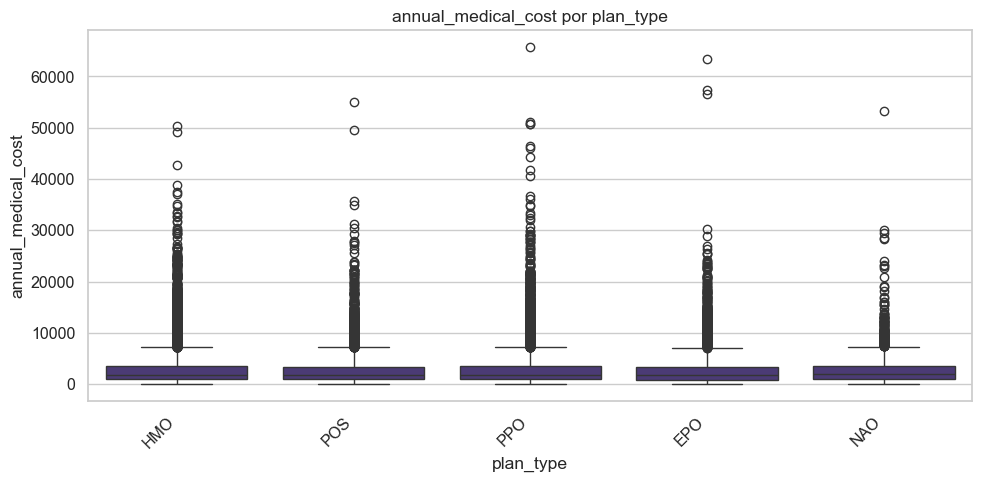

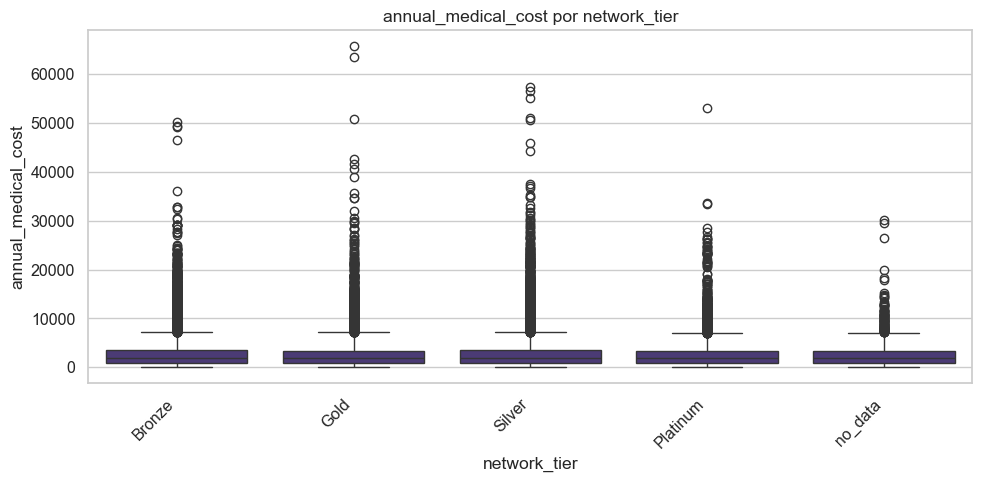

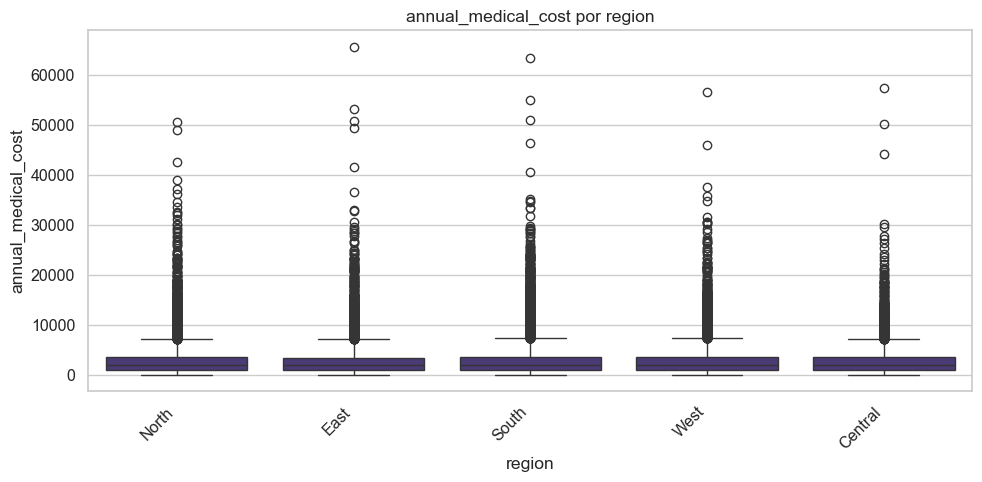

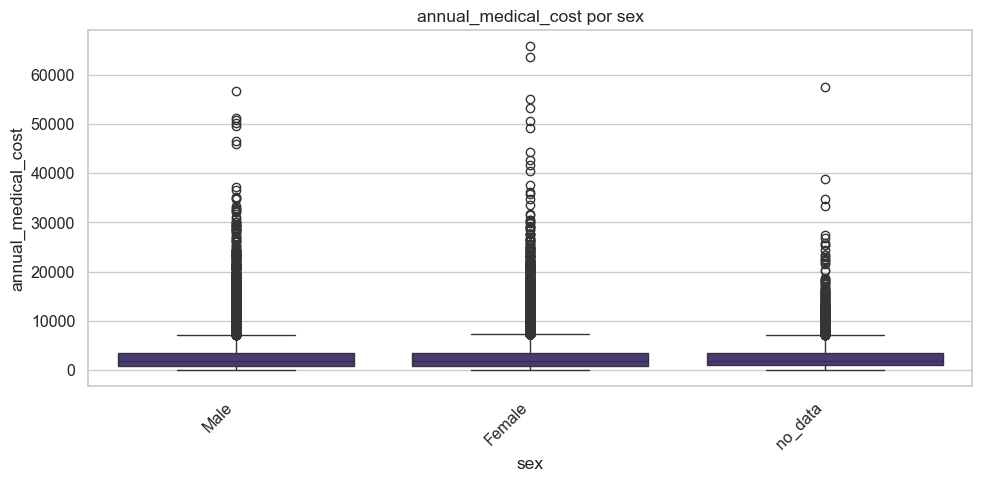

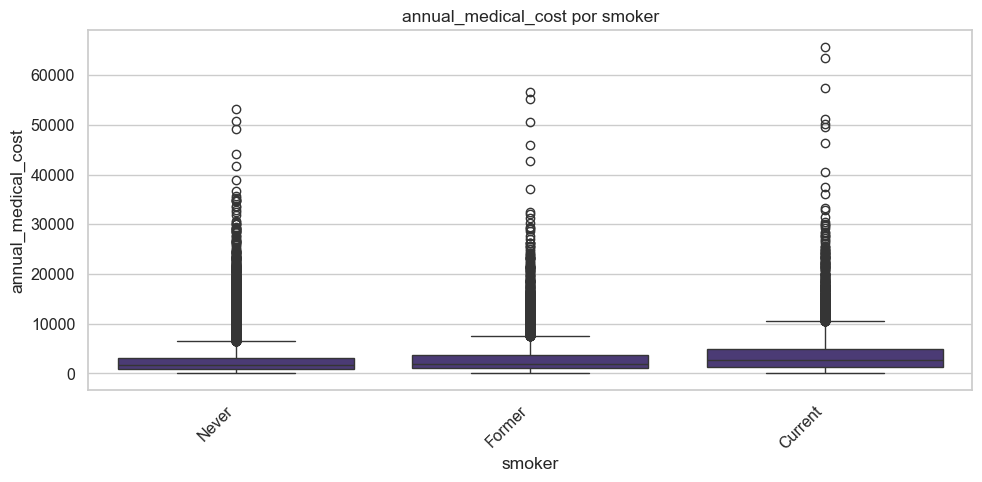

In [63]:
# Boxplots (compara distribuição do custo por categoria)

for c in cats_focus:
    boxplot_cat_vs_target(df, c, target)


Se vocês repararem, ele mostra muitos outliers e, por isso, não conseguimos enxergar o boxplot direito. O ideal seria limpar (não precisa salvar um novo csv, pode limpar aqui mesmo no notebook e usar como um df_limpo sei lá) ou selecionar apenas os dados dentro de um range para fazer esses gráficos específicos tipo, definir um df_boxplot tal que os custos sejam no máximo 10.000 (olhando pra esses casos).

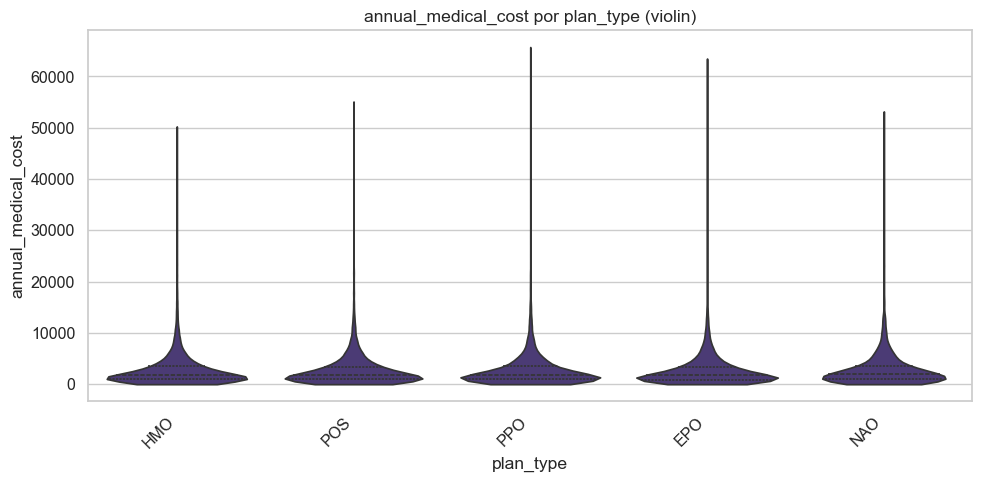

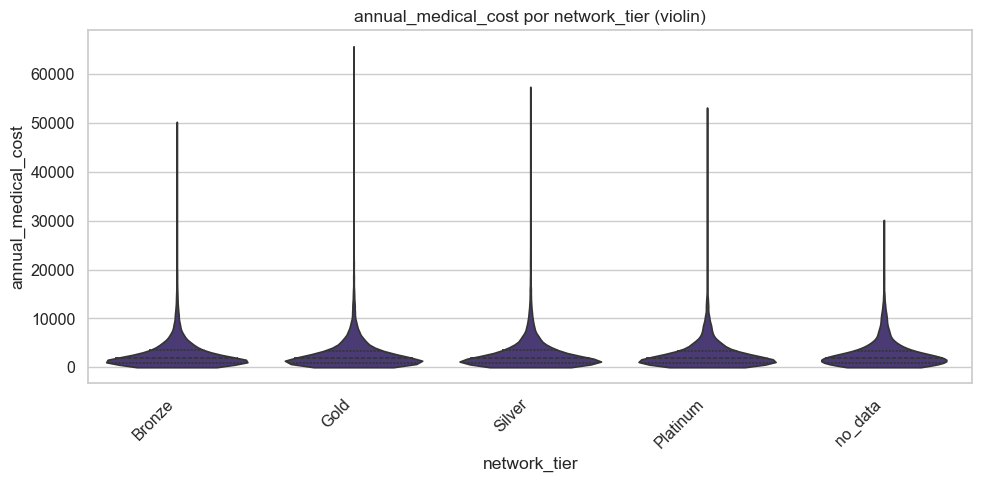

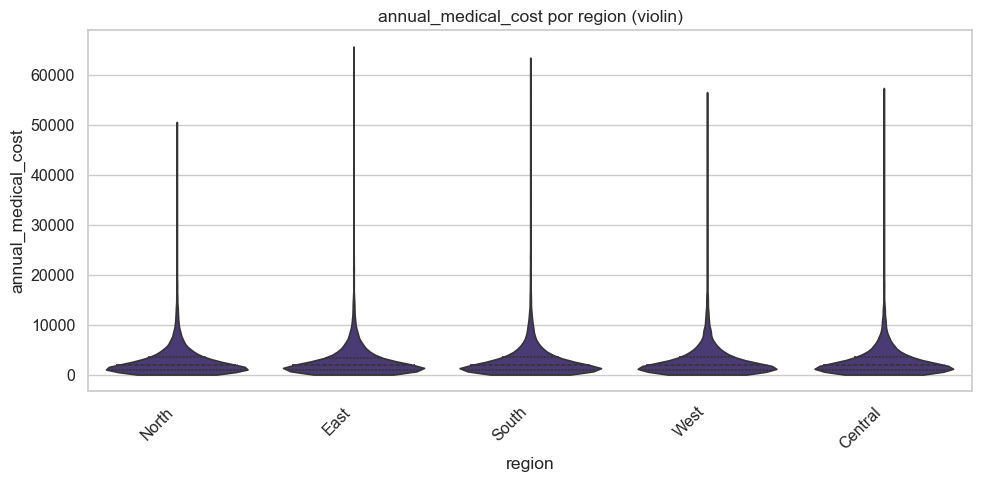

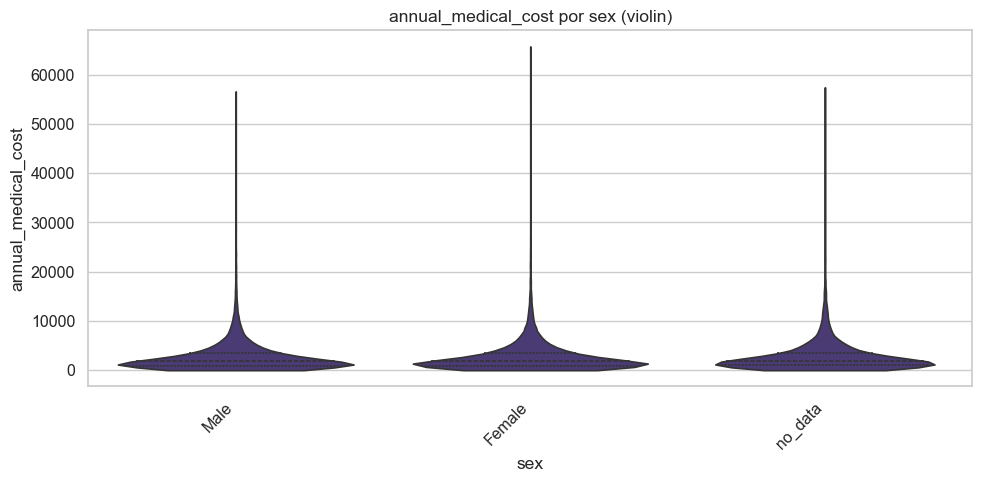

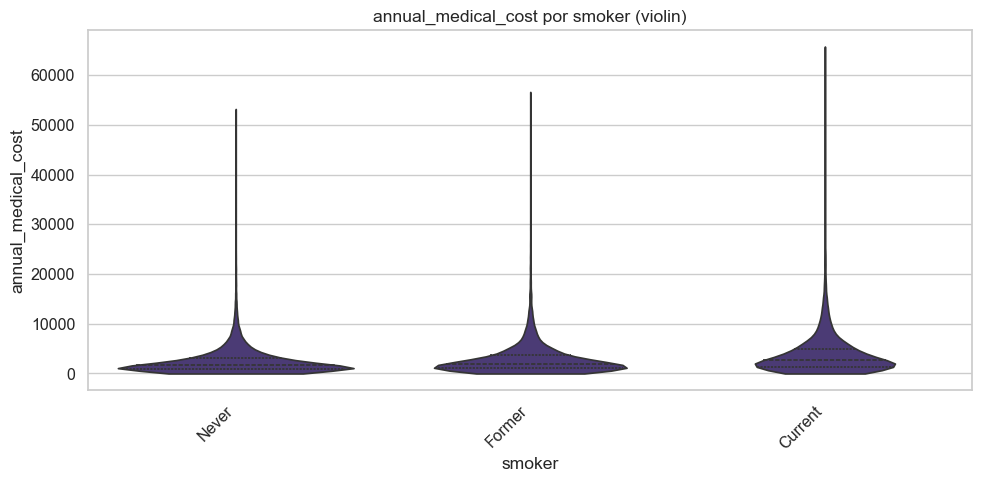

In [64]:
# Violin plots (mesma ideia, visual diferente)

for c in cats_focus:
    violin_cat_vs_target(df, c, target)

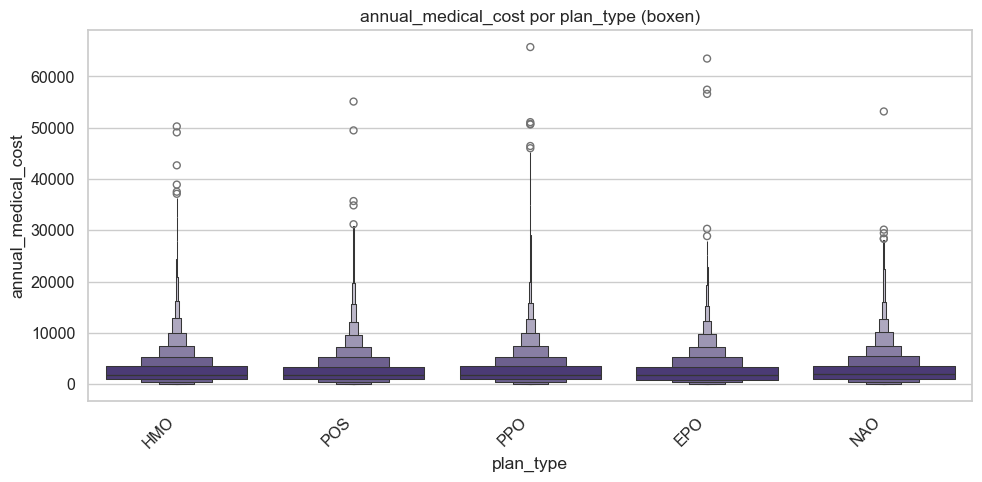

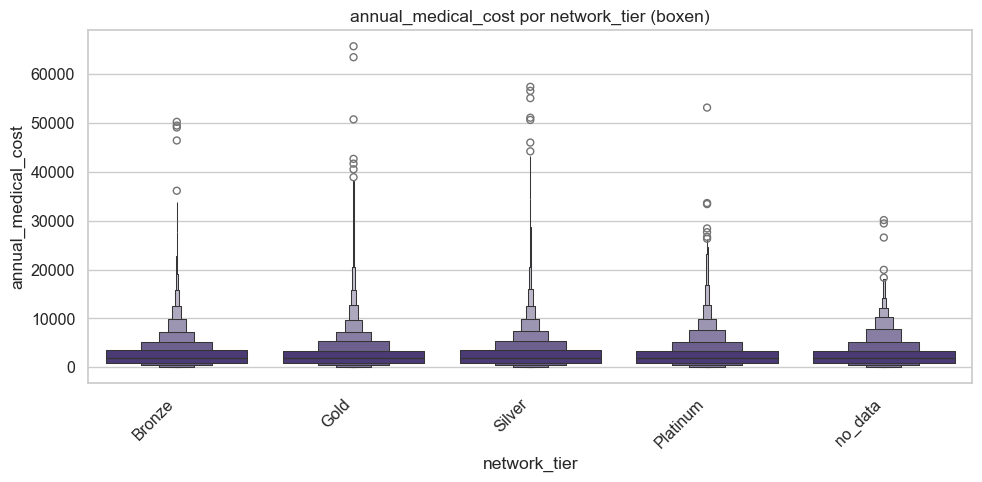

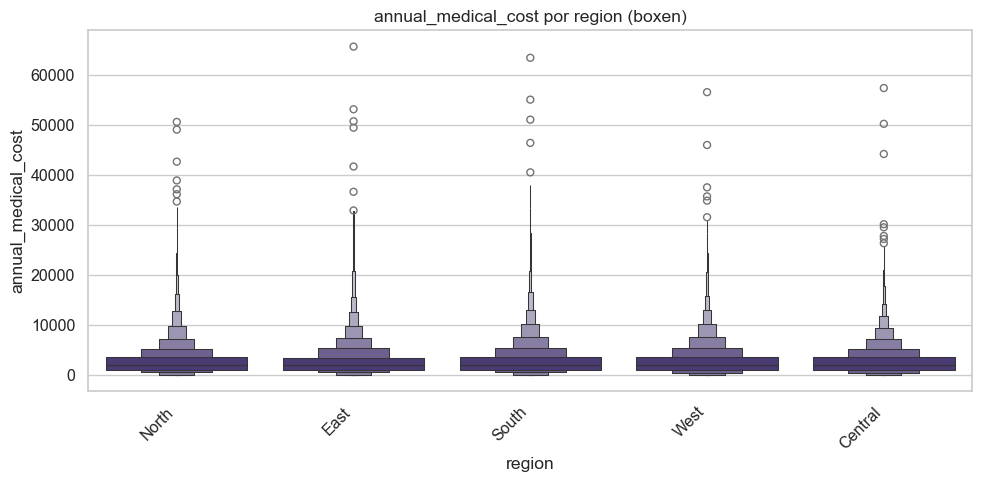

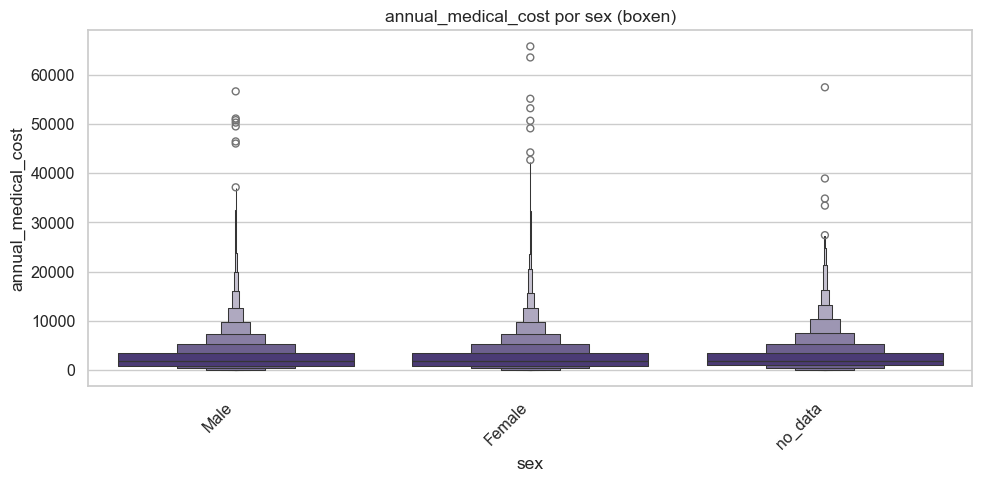

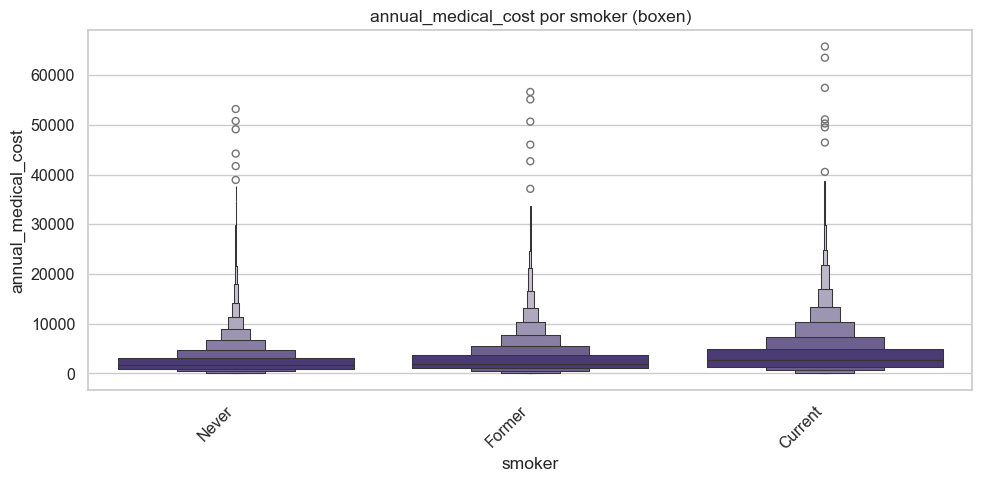

In [ ]:
# Boxen plots (bom para big data)

for c in cats_focus:
    boxen_cat_vs_target(df, c, target)

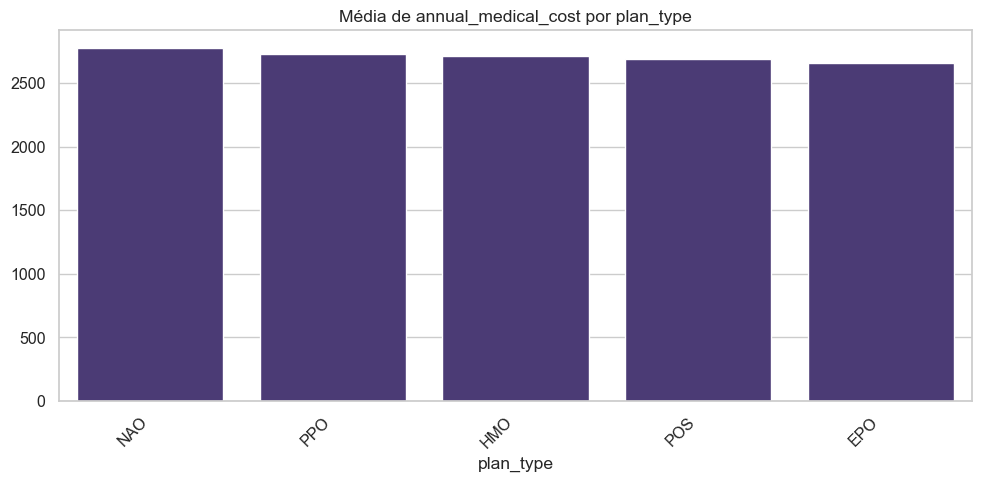

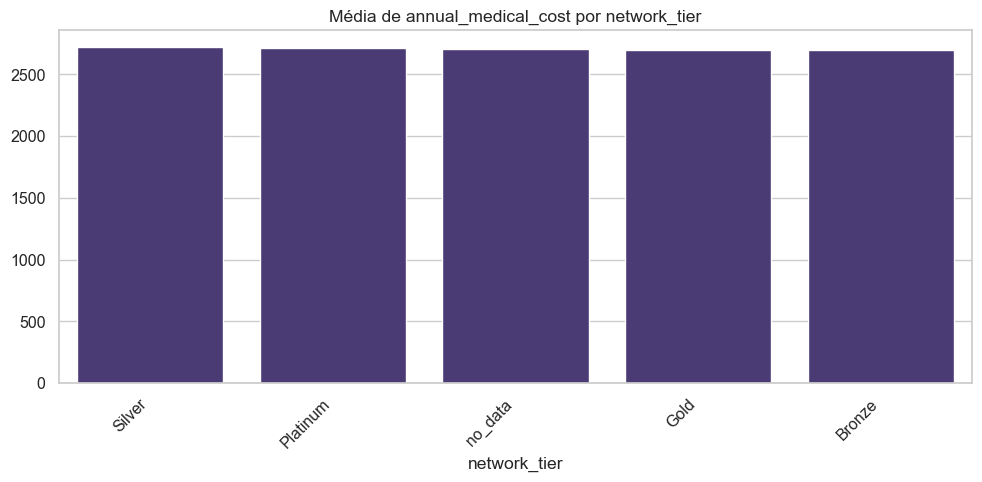

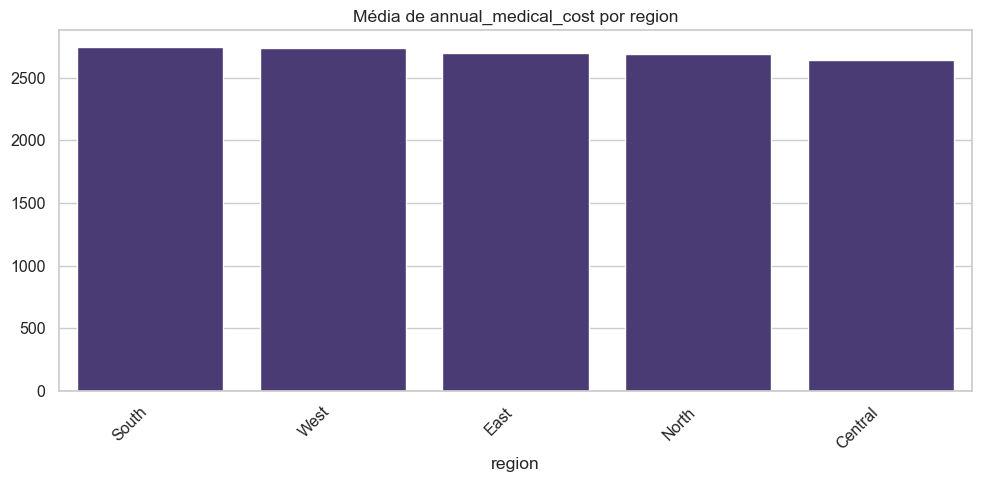

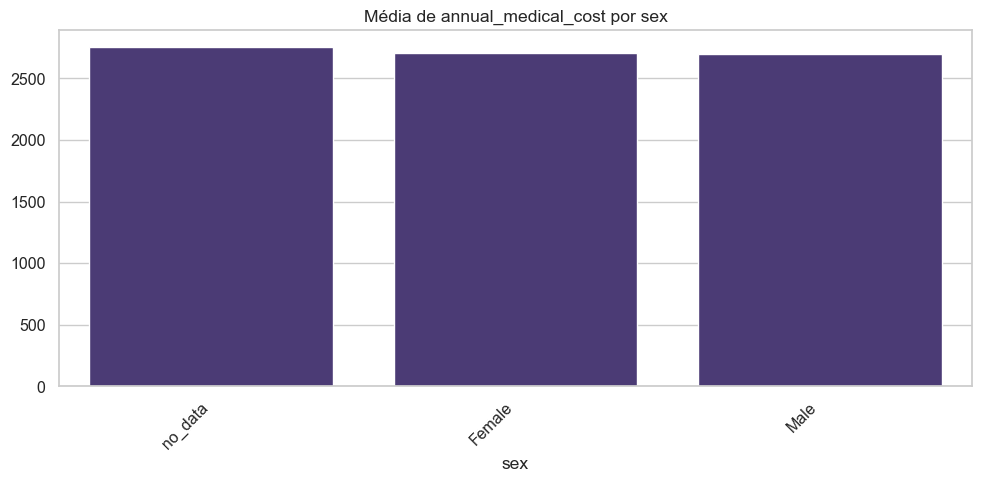

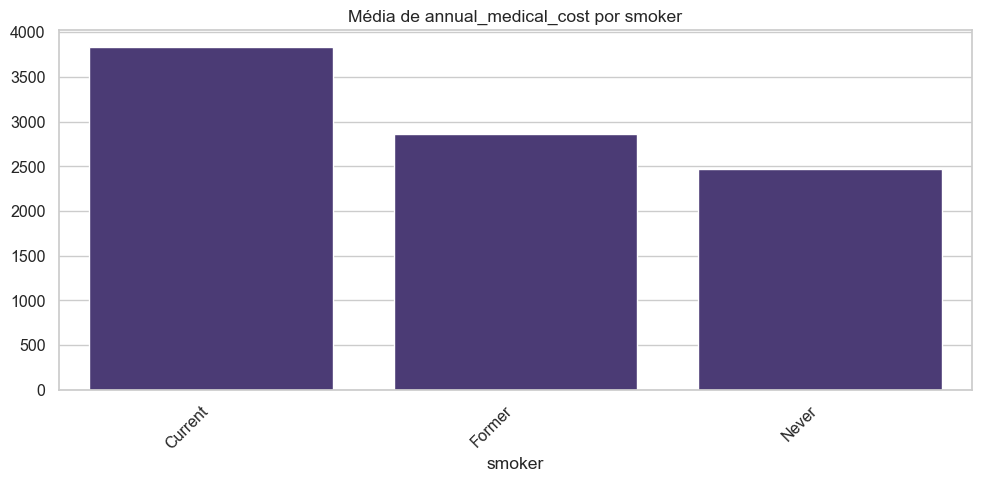

In [66]:
# Barras: média do custo por categoria

for c in cats_focus:
    bar_mean_target_by_cat(df, c, target)


No caso, vemos que os valores estão próximos, então fica interessante formatar os gráficos colocando o número das barras explicito.

# verifiquem esses no_data !!

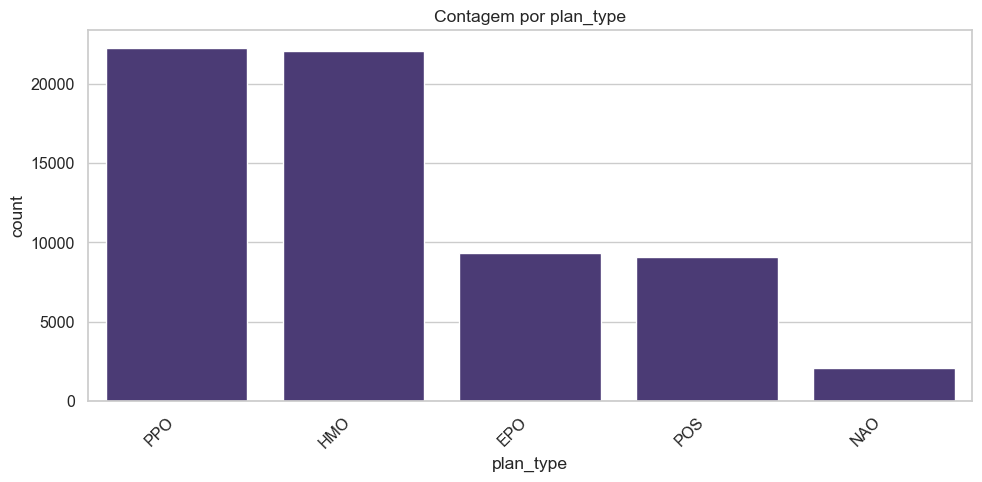

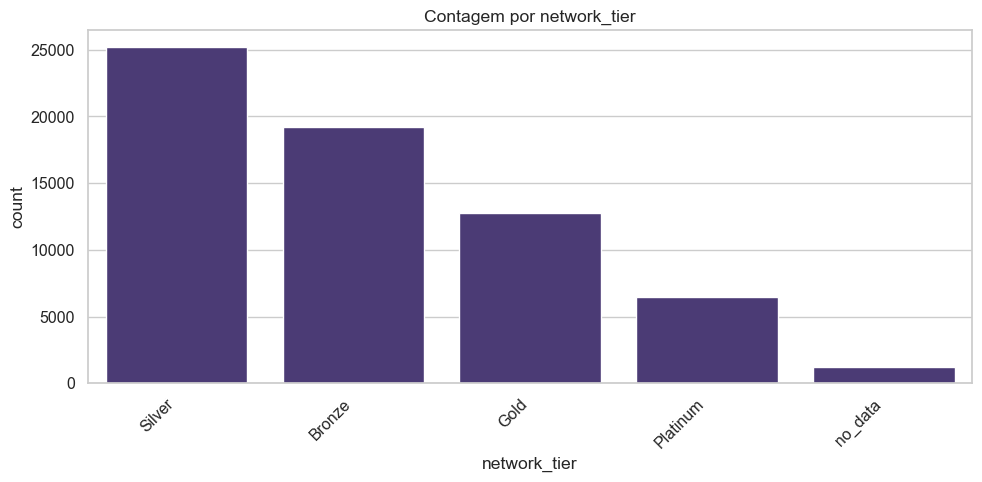

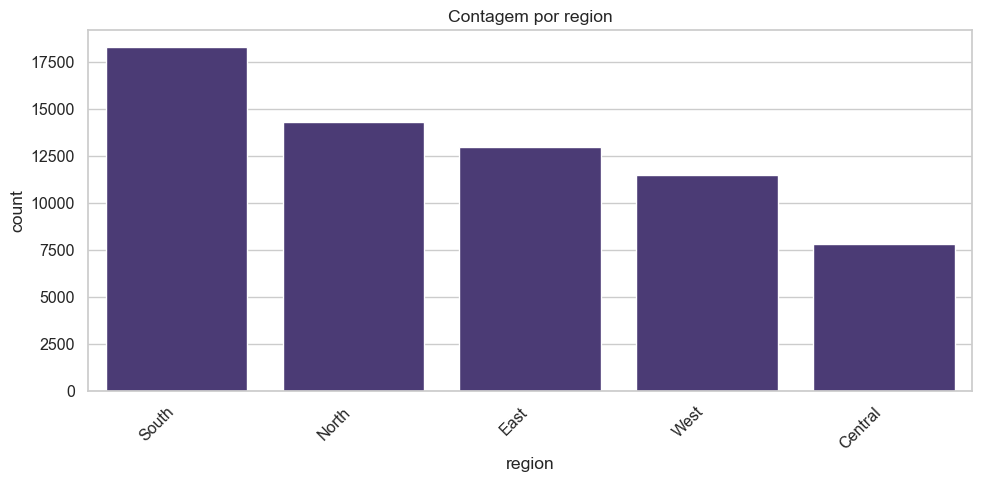

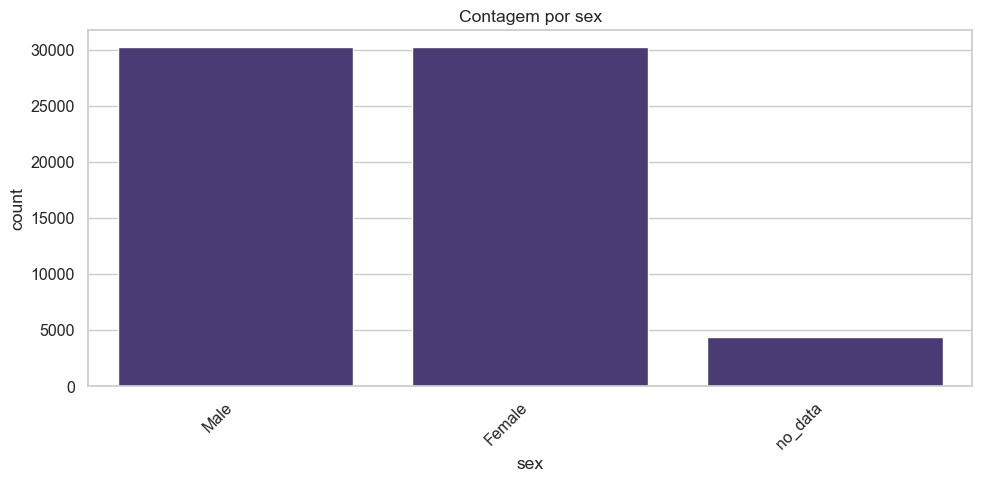

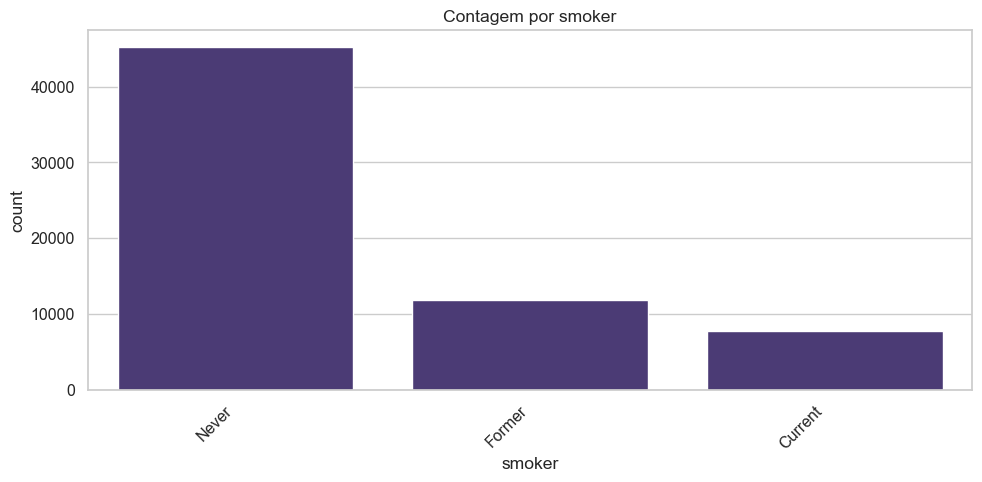

In [67]:
# Countplots (distribuição das categorias)

for c in cats_focus:
    countplot_cat(df, c)


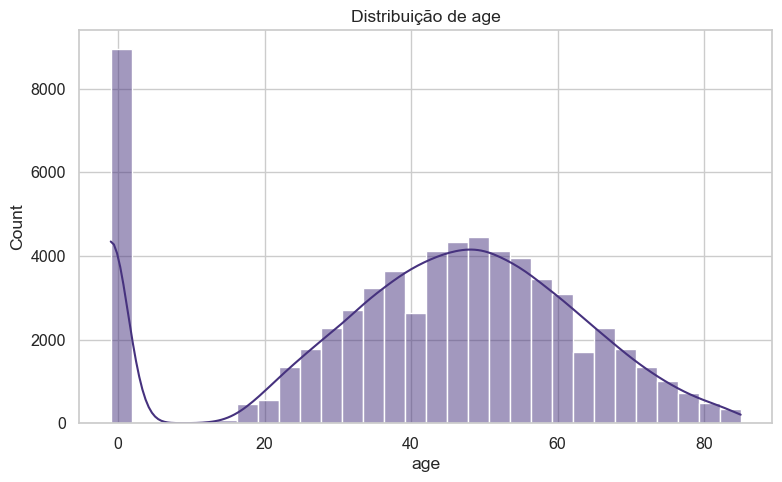

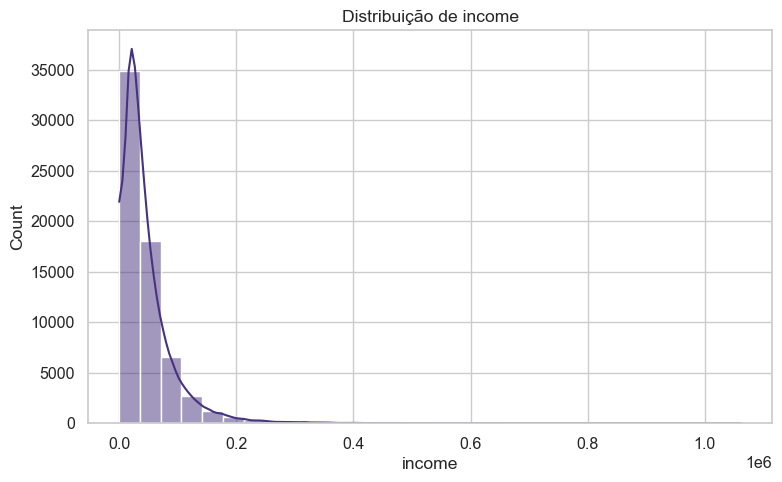

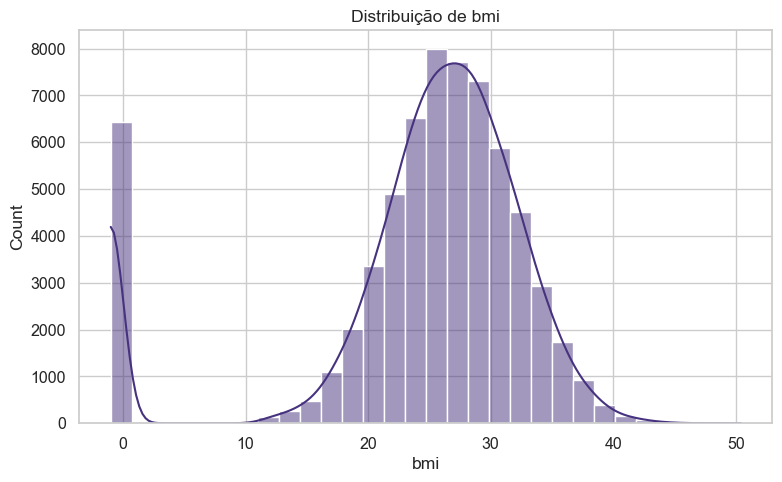

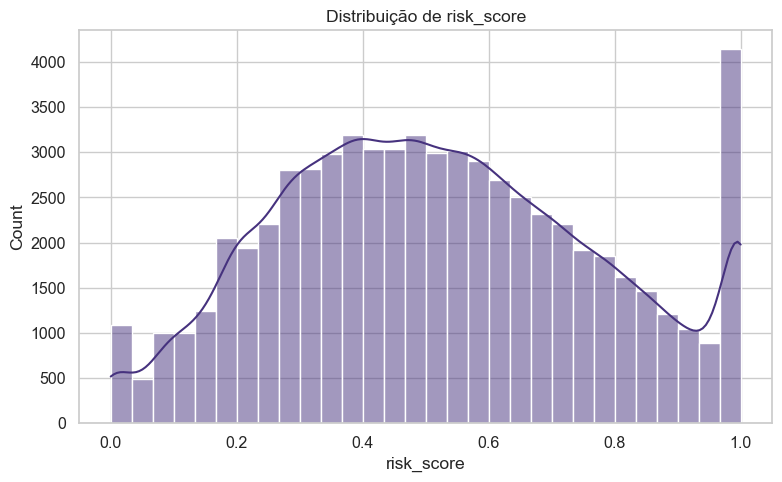

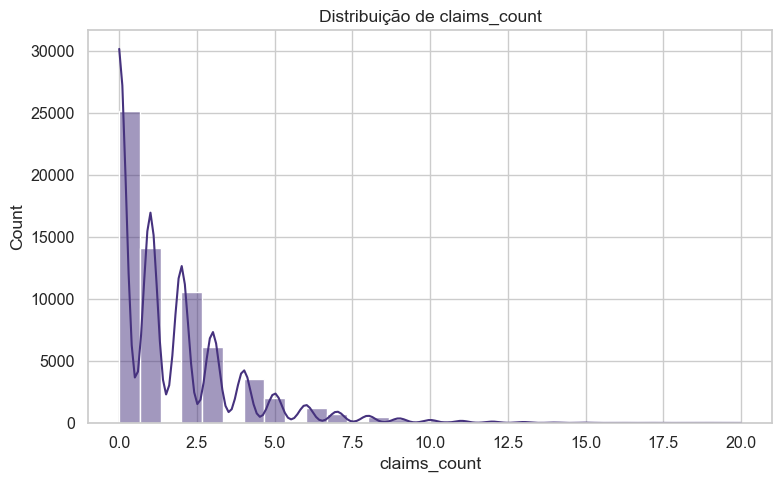

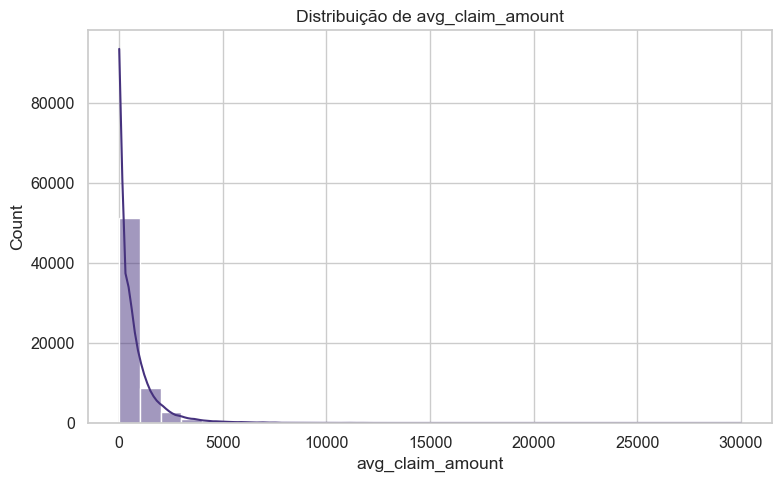

In [68]:
# Histograma das variáveis numéricas focadas

for c in nums_focus:
    hist_kde(df, c)


Olha, da pra ver que aqui também os outliers prejudicam a visualização. Então podem lidar do mesmo jeito, seja limitando o eixo x do gráfico ou limpando num DF mesmo. 

## IMPORTANTÍSSIMO que façam isso

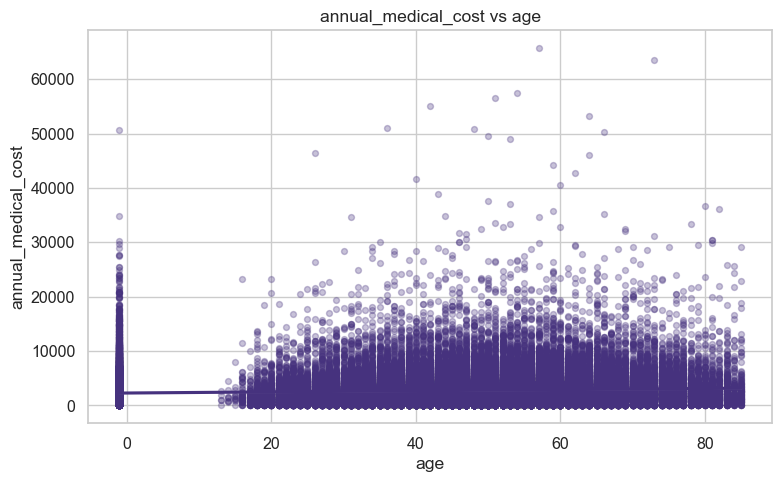

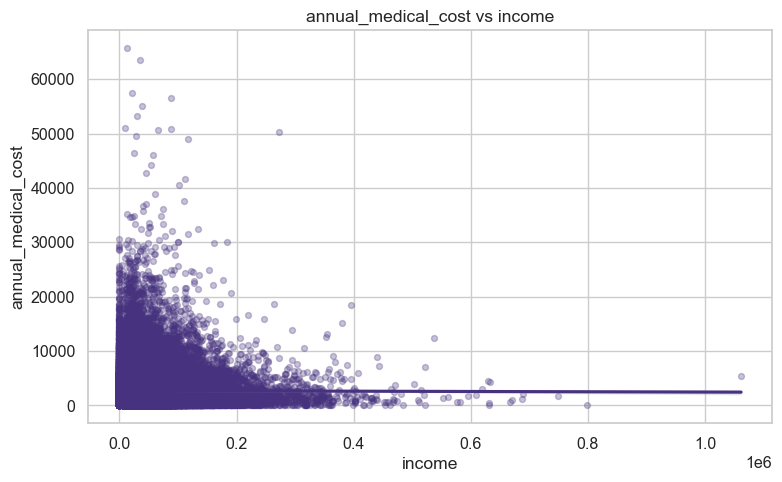

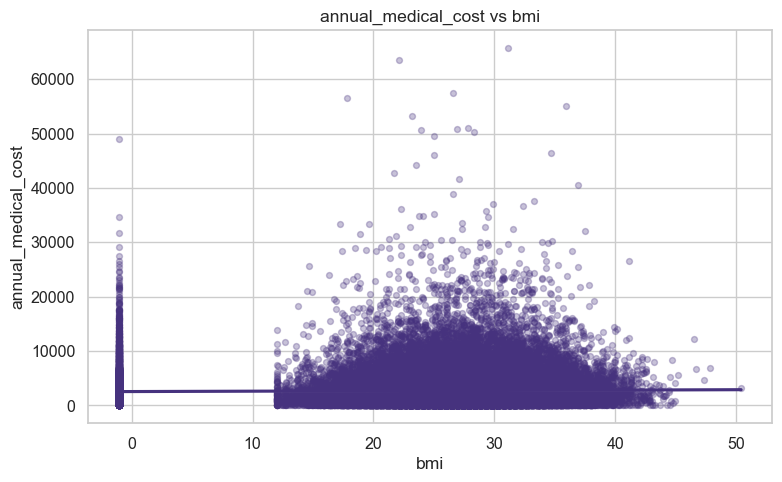

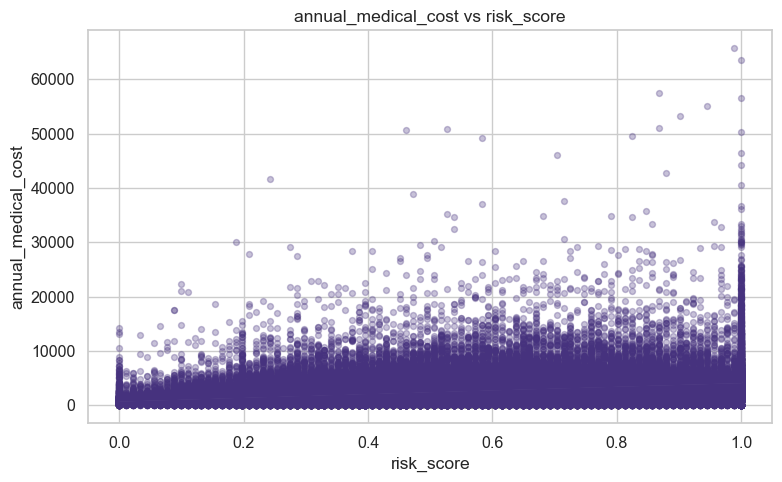

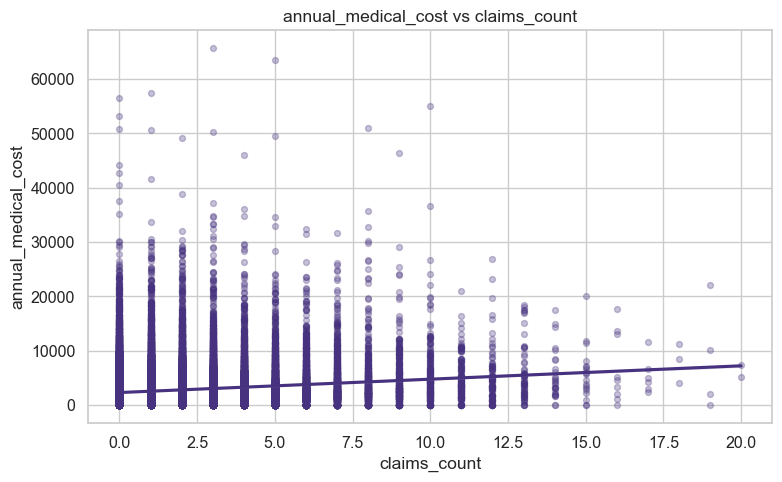

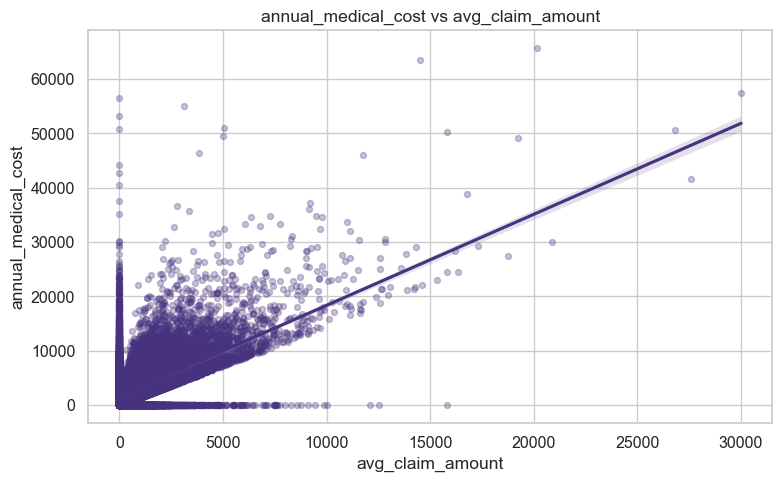

In [69]:
# Scatter com linha (numérico × custo)

for c in nums_focus:
    scatter_with_trend(df, c, target)


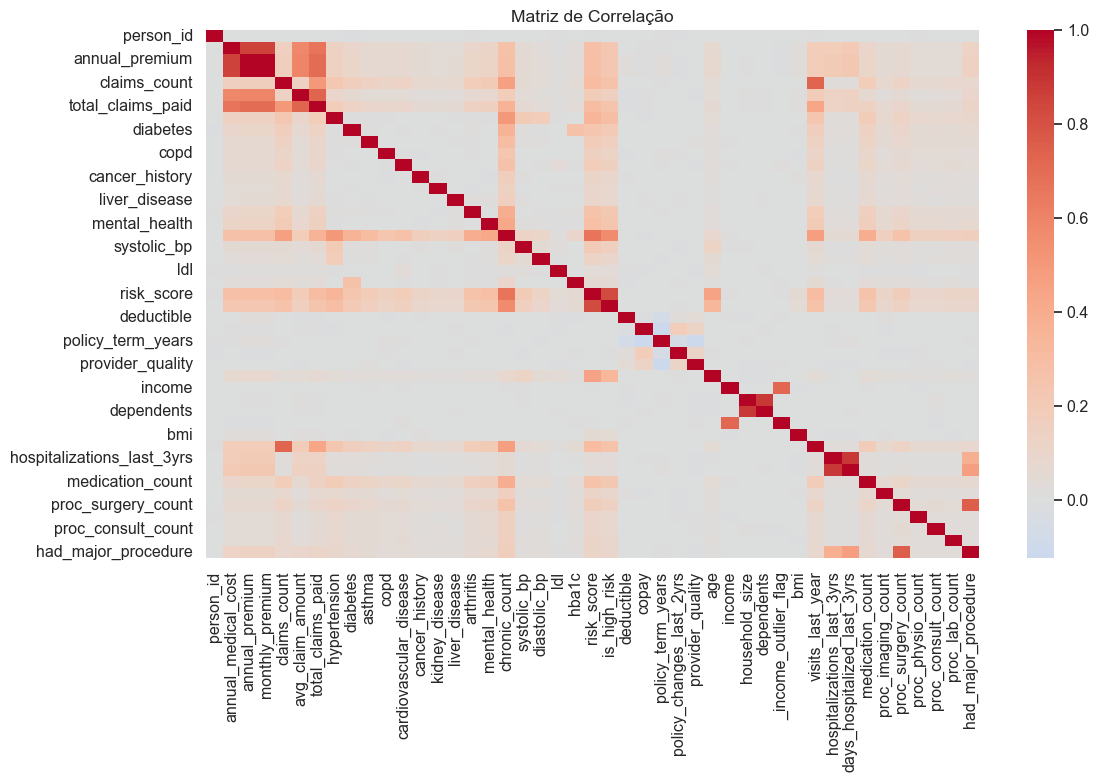

In [ ]:
# Heatmap de correlações geral

corr = corr_heatmap(df)

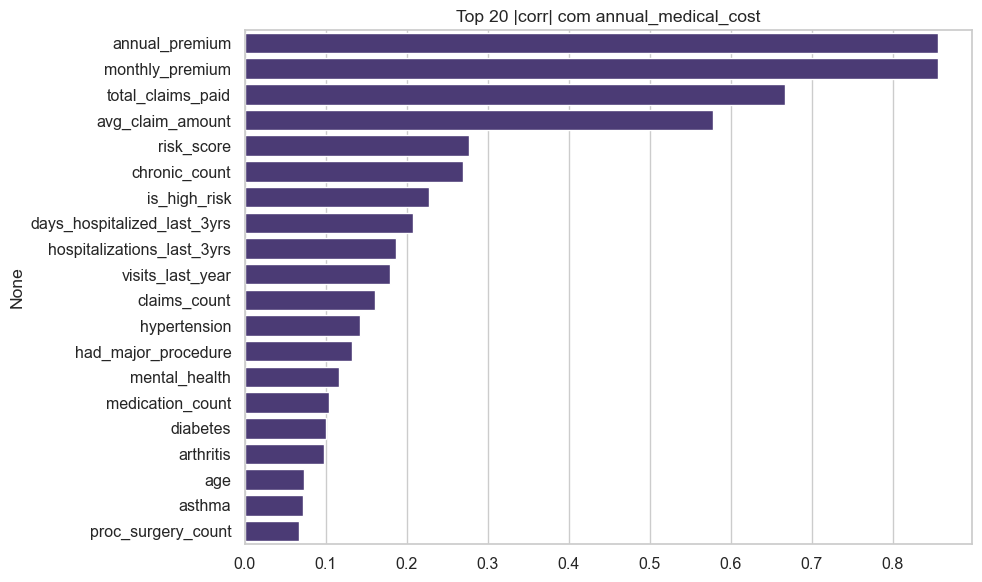

In [ ]:
# Ranking das correlações com o custo (super útil para modelo)

bar_corr_with_target(df, target, top_n=20)

Agora aqui vai uma minha sugestão.

Como temos muitas colunas binárias (0/1), se vamos analisar apenas essa informação, sem adicionar uma outra métrica (por exemplo fazer uma matriz de confusão entre duas delas), uma ideia simples e boa de visualizar é um gráfico de pizza, que da uma ideia de partes por total.

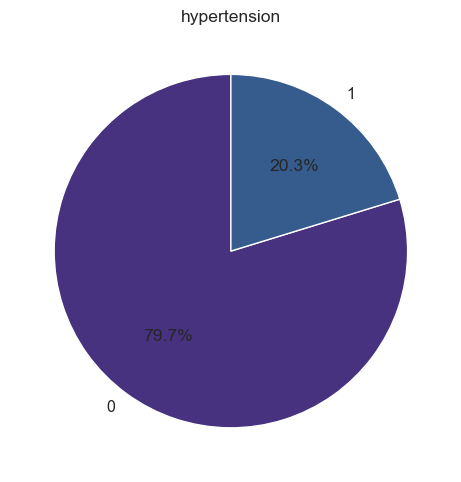

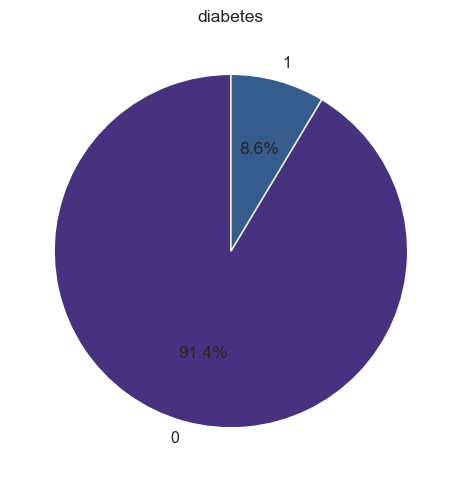

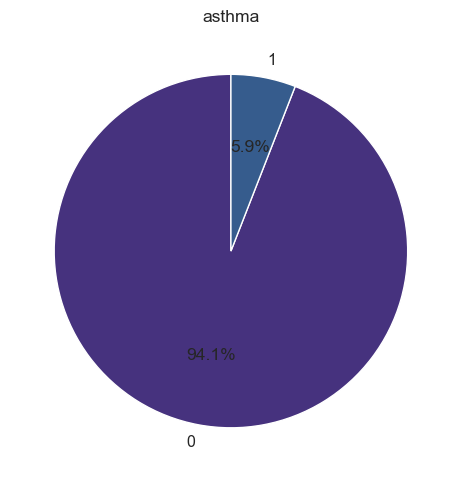

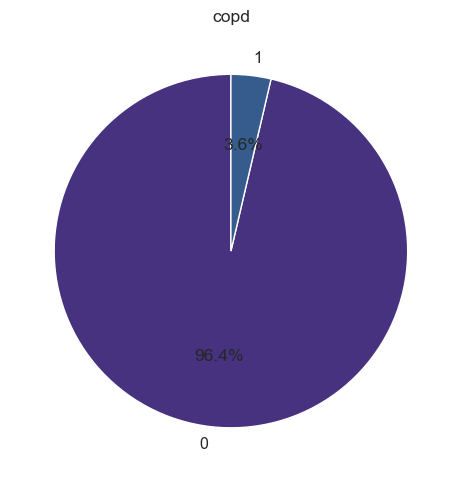

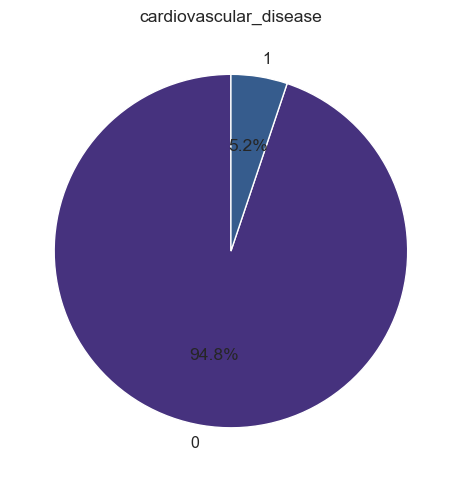

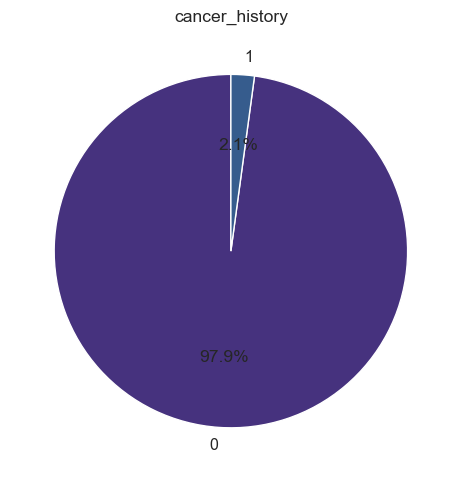

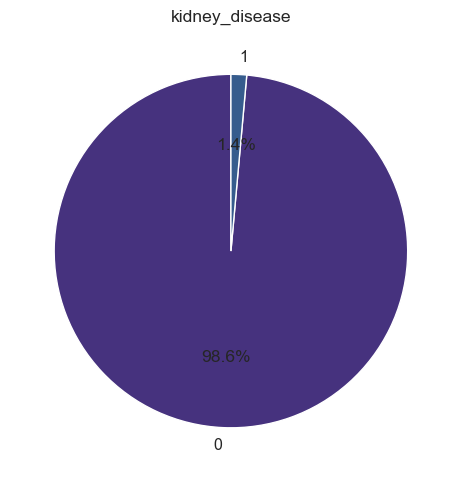

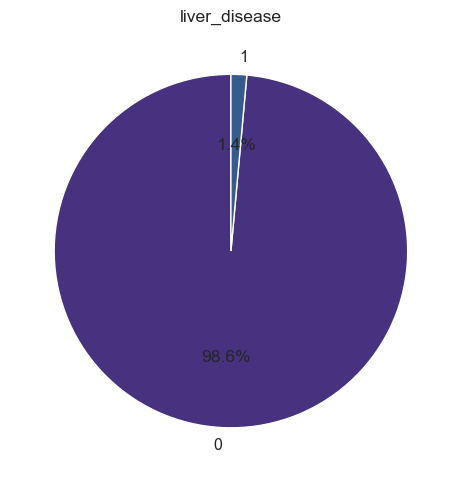

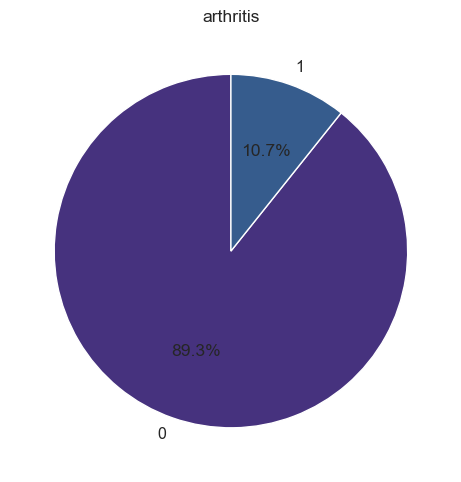

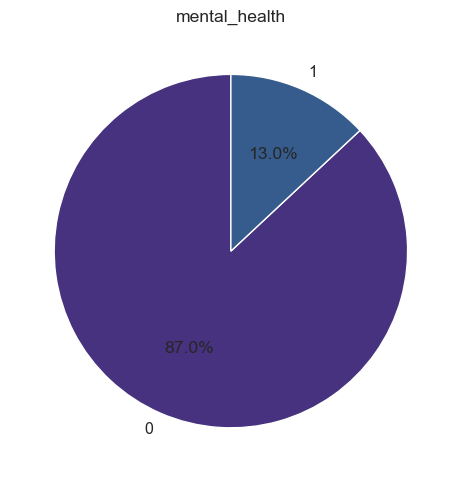

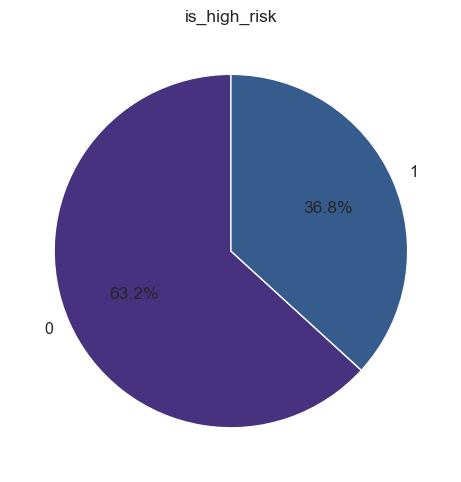

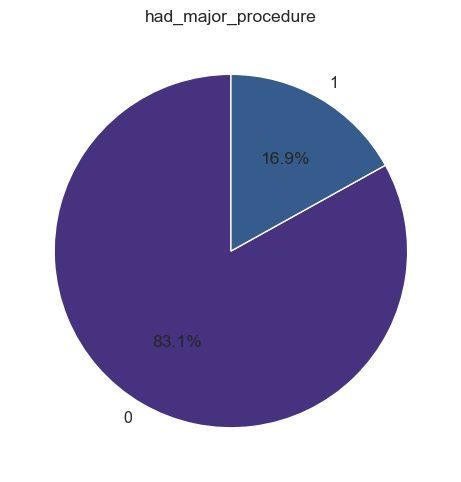

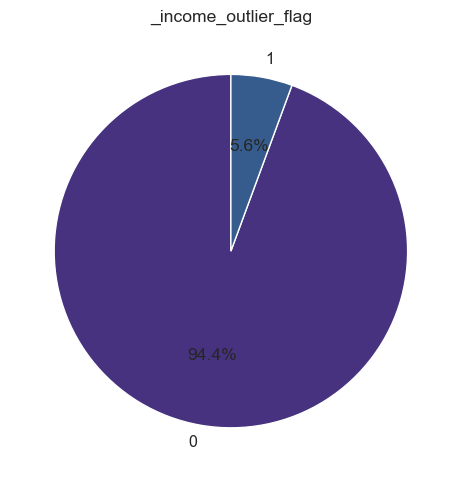

In [73]:
# Gráficos de Pizzas para variáveis 0/1 do dataset

binarias = [
    "hypertension","diabetes","asthma","copd","cardiovascular_disease","cancer_history",
    "kidney_disease","liver_disease","arthritis","mental_health","is_high_risk",
    "had_major_procedure","_income_outlier_flag"
]

for c in binarias:
    if c in df.columns:
        pie_binary(df, c)


# SUGESTÃO 

Uma sugestão que eu dou, por exemplo, seria fazer um scattered no qual você tem uma distribuição de quanto cada pessoa paga (por ano ou mensal, acho que não faz tanta diferença) x idade, sendo que se nao tiver nenhuma doença as bolinhas ficam de uma cor, se tiver doença y, de outra se tiver doença z... 

Também da pra fazer por doença pra visualizar melhor!

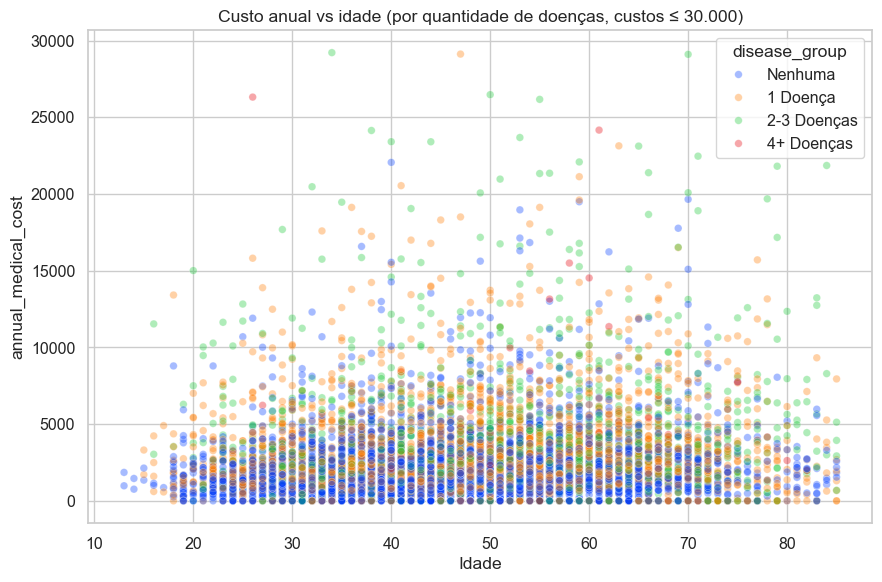

In [ ]:
# aqui a sugestão pode ficar mais ou menos assim:

# selecionar colunas 0/1 de doenças
disease_cols = [
    "hypertension","diabetes","asthma","copd","cardiovascular_disease","cancer_history",
    "kidney_disease","liver_disease","arthritis","mental_health"
]
disease_cols = [c for c in disease_cols if c in df.columns]  # garante que existem

# função auxiliar para categorizar número de doenças
def categorize(n):
    if n == 0:
        return "Nenhuma"
    elif n == 1:
        return "1 Doença"
    elif n <= 3:
        return "2-3 Doenças"
    else:
        return "4+ Doenças"

# cria cópia sem modificar df original
tmp = df.copy()

tmp["disease_count"] = tmp[disease_cols].sum(axis=1)
tmp["disease_group"] = tmp["disease_count"].apply(categorize)

# por conta dos outliers:
# definimos um filtro de custo <= 30000 
# e idade > 0
tmp = tmp[(tmp[target] <= 30000) & (tmp["age"] > 0)]

# scatter colorido
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=tmp.sample(8000, random_state=42) if len(tmp) > 8000 else tmp,
    x="age",
    y=target,
    hue="disease_group",
    palette="bright",       # essa aqui é a paleta de cores, para diferenciar melhor (se tirar essa linha fica na paleta do lilás) e podem pesquisar outras que vcs gostem mais
    alpha=0.35,
    s=30
)
plt.title("Custo anual vs idade (por quantidade de doenças, custos ≤ 30.000)")
plt.xlabel("Idade")
plt.ylabel(target)
plt.tight_layout()
plt.show()


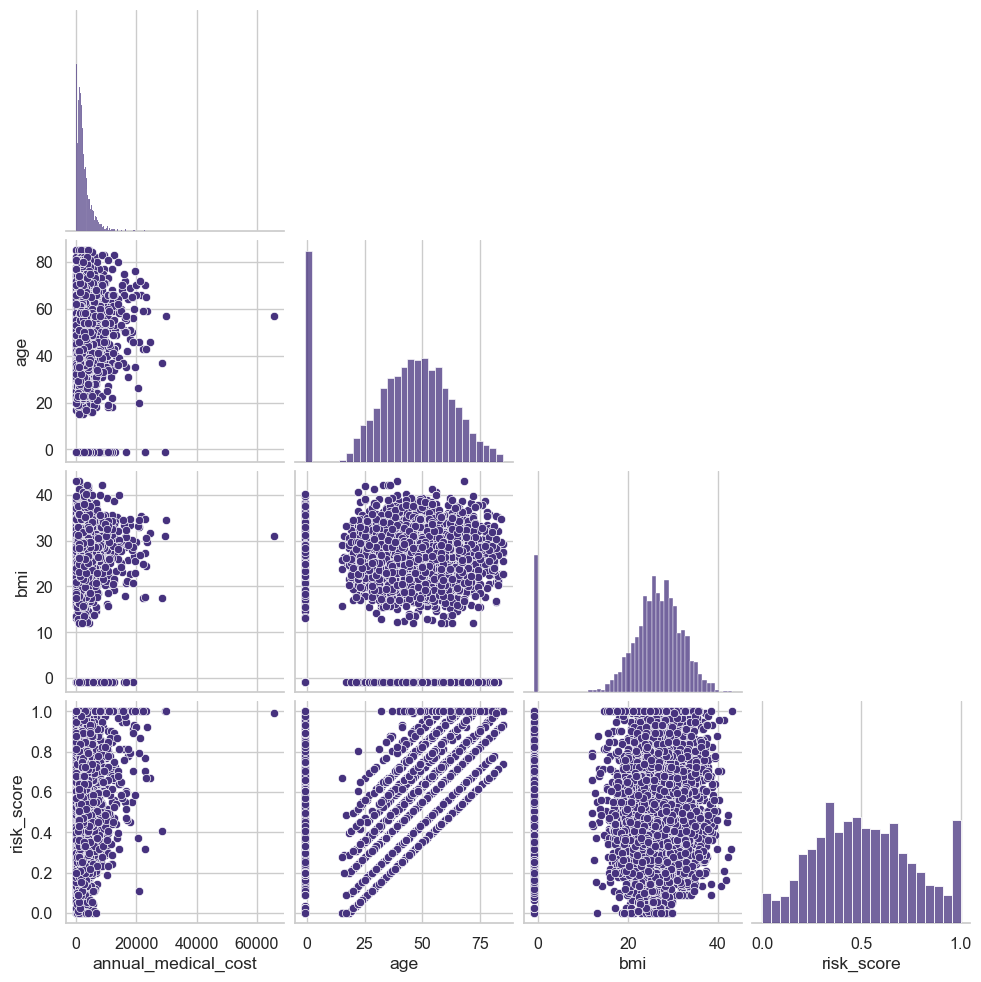

In [74]:
# Pairplot entre custo e 2 variáveis numéricas importantes

pairplot_vars(df, [target, "age", "bmi", "risk_score"])


Alguns insights desses gráficos:
- claramente o risk score depende da idade
- o annual_medical_cost depende aumenta com o risk score mas não é uma relação direta (o que provavelmente deveria ser)
- o bmi e o risk score nao estão tão bem relacionados, percebemos apenas uma tendência da população em si